In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

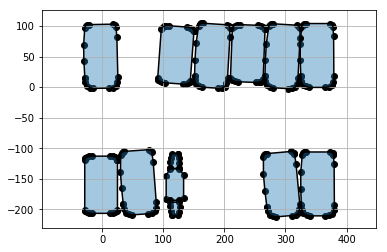

In [23]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
def make_point(x_str, y_str):
    return np.array([float(x_str), float(y_str)])

def visualize_polygon(path_str):
    path_str = path_str.replace(',', ' ')
    tokens = path_str.split(' ')
    point = np.zeros(2)
    points = []
    for i in range(len(tokens)):
        token = tokens[i]
        if token == 'm' or token == 'l':
            for j in range(i+1, len(tokens)-1, 2):
                if not is_number(tokens[j]):
                    break
                point += make_point(tokens[j], tokens[j+1])
                points.append(point.copy())
                i += 2
        if token == 'h' or token == 'v':
            for j in range(i+1, len(tokens)):
                if not is_number(tokens[j]):
                    break
                if token == 'h':
                    point[0] += float(tokens[j])
                else:
                    point[1] += float(tokens[j])
                points.append(point.copy())
                i += 1
    points.append(points[0].copy())
    points = np.array(points)
    # flip y axis for plotting
    points[:, 1] = -points[:, -1]
    
    plt.plot(points[:, 0], points[:, 1], c="black")
    plt.scatter(points[:, 0], points[:, 1], c="black")
    polygon = Polygon(points, True)
    plt.gca().add_collection(PatchCollection([polygon], alpha=0.4))
    
def parse_svg(filename):
    for line in open(filename, 'r'):
        line = line.strip()
        if line.startswith('d="'):
            visualize_polygon(line[3:-1])
    
plt.grid()
plt.axis("equal")
parse_svg('./bin/parking/parking1.svg')
plt.savefig('parking1.png', dpi=300)